## Data Exploration Analysis

In [1]:
# Libraries
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Flamingo Data

In [3]:
path = "/content/drive/MyDrive/BCU/Assignment_Flamingo/"

**Dataset ad_clicks.csv**


Database of clicks on ads
- timestamp: when the click occurred.
- txId: a unique id (within ad- clicks.log) for the click
- userSessionid: the id of the user session for the user who made the click
- teamid: the current team id of the user who made the click
- userid: the user id of the user who made the click
- adId: the id of the ad clicked on
- adCategory: the category/type of ad clicked on


In [ ]:
# Read file
df_adclicks = pd.read_csv(path+'/DataSet/flamingo-data/ad-clicks.csv')

In [ ]:
df_adclicks.head()

,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing


In [ ]:
#Dtypes of features
df_adclicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      16323 non-null  object
 1   txId           16323 non-null  int64 
 2   userSessionId  16323 non-null  int64 
 3   teamId         16323 non-null  int64 
 4   userId         16323 non-null  int64 
 5   adId           16323 non-null  int64 
 6   adCategory     16323 non-null  object
dtypes: int64(5), object(2)
memory usage: 892.8+ KB


In [ ]:
#Description of the dataset
df_adclicks.describe()

,txId,userSessionId,teamId,userId,adId
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,24613.829259,22090.773449,70.294921,1187.464192,14.654046
std,9513.244787,8780.273065,39.631995,691.561945,8.623599
min,5972.000000,5649.000000,2.000000,1.000000,0.000000
25%,16994.500000,15880.000000,35.000000,564.000000,7.000000
50%,25111.000000,21017.000000,69.000000,1161.000000,15.000000
75%,32597.500000,27912.000000,99.000000,1771.000000,22.000000
max,39833.000000,39623.000000,179.000000,2387.000000,29.000000


In [ ]:
#Number of rows and columns in the dataset
df_adclicks.shape

(16323, 7)

In [ ]:
# Check null value
df_adclicks.isnull().sum()

timestamp        0
txId             0
userSessionId    0
teamId           0
userId           0
adId             0
adCategory       0
dtype: int64

In [ ]:
# Sum the total number of ads per user and rename the columns to be called 'userId' and 'totalAdClicks'.

user_adclicks = df_adclicks.groupby('userId').size().reset_index(name='totalAdClicks')
user_adclicks.head()

,userId,totalAdClicks
0,1,44
1,8,10
2,9,37
3,10,19
4,12,46


In [ ]:
# Sum the total number of ads per user and rename the columns to be called 'userId' and 'totalAdClicks'.

user_adclicks = df_adclicks.groupby('userId').size().reset_index(name='totalAdClicks')
user_adclicks.sort_values(by='totalAdClicks', ascending=False).head()


,userId,totalAdClicks
549,2221,67
574,2306,61
503,2009,59
188,807,58
24,83,56


In [ ]:
user_adclicks.shape

(597, 2)

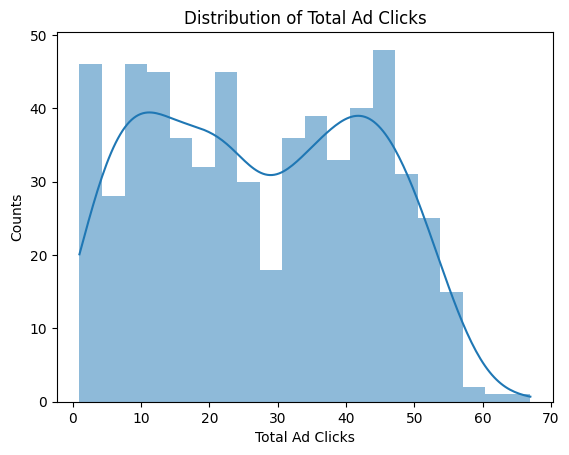

In [ ]:
# Visualize totalAdClicks

# Plot a histogram
sns.histplot(user_adclicks['totalAdClicks'], kde=True, bins=20, edgecolor='none')

plt.xlabel('Total Ad Clicks')
plt.ylabel('Counts')
plt.title('Distribution of Total Ad Clicks')
plt.show()


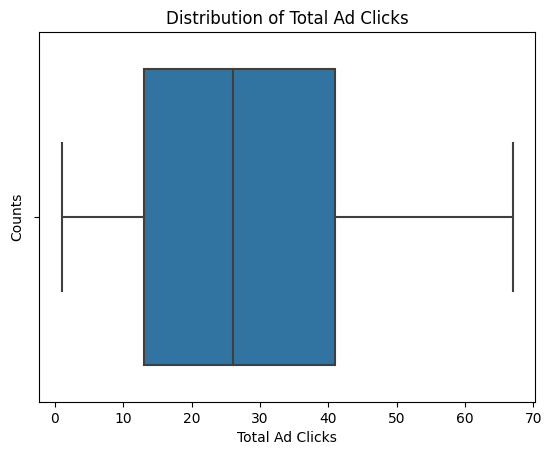

In [ ]:
# Visualize totalAdClicks

# Plot a box plot
sns.boxplot(x=user_adclicks['totalAdClicks'])

plt.xlabel('Total Ad Clicks')
plt.ylabel('Counts')
plt.title('Distribution of Total Ad Clicks')
plt.show()


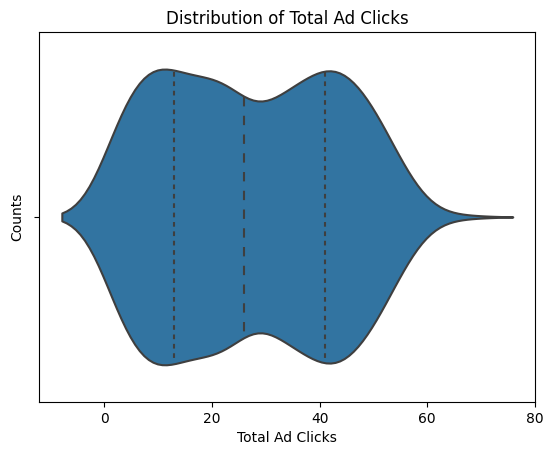

In [ ]:
# Visualize totalAdClicks

# Plot a violin plot
sns.violinplot(x=user_adclicks['totalAdClicks'], inner='quartile')

plt.xlabel('Total Ad Clicks')
plt.ylabel('Counts')
plt.title('Distribution of Total Ad Clicks')
plt.show()


**Dataset buy-clicks.csv**

Database of purchases
- timestamp: when the purchase was made.
- txId: a unique id (within buy- clicks.log) for the purchase
- userSessionId: the id of the user session for the user who made the purchase
- team: the current team id of the user who made the purchase
- userId: the user id of the user who made the purchase
- buyId: the id of the item purchased price: the price of the item
purchased

In [ ]:
# Read file
df_buyclicks = pd.read_csv(path+'/DataSet/flamingo-data/buy-clicks.csv')

In [ ]:
df_buyclicks.head()

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [ ]:
df_buyclicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      2947 non-null   object 
 1   txId           2947 non-null   int64  
 2   userSessionId  2947 non-null   int64  
 3   team           2947 non-null   int64  
 4   userId         2947 non-null   int64  
 5   buyId          2947 non-null   int64  
 6   price          2947 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 161.3+ KB


In [ ]:
# Check null value
df_buyclicks.isnull().sum()

timestamp        0
txId             0
userSessionId    0
team             0
userId           0
buyId            0
price            0
dtype: int64

In [ ]:
# Total money spent by item and rename the columns to be called 'itemId' and 'totalRevenue'

revenue_per_item = df_buyclicks[['buyId','price']].groupby('buyId').agg(['count','sum'])
revenue_per_item = revenue_per_item.reset_index()
revenue_per_item.columns = ['itemId','totalBuy','totalRevenue'] #rename the columns
revenue_per_item

,itemId,totalBuy,totalRevenue
0,0,592,592.0
1,1,269,538.0
2,2,714,2142.0
3,3,337,1685.0
4,4,425,4250.0
5,5,610,12200.0


In [ ]:
# total revenue
revenue_per_item['totalRevenue'].sum()

21407.0

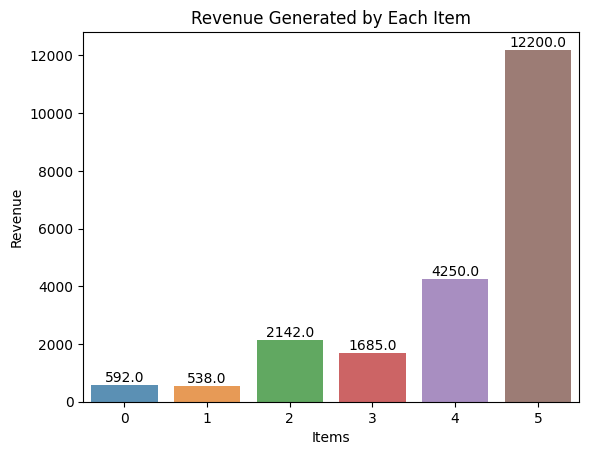

In [ ]:
# Visualize Revenue generated by item

# Plot a histogram
ax=sns.barplot(x=revenue_per_item['itemId'], y=revenue_per_item['totalRevenue'], alpha=0.8)

plt.xlabel('Items')
plt.ylabel('Revenue')
plt.title('Revenue Generated by Each Item')
# Add numbers on top of each bar
for i, v in enumerate(revenue_per_item['totalRevenue']):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

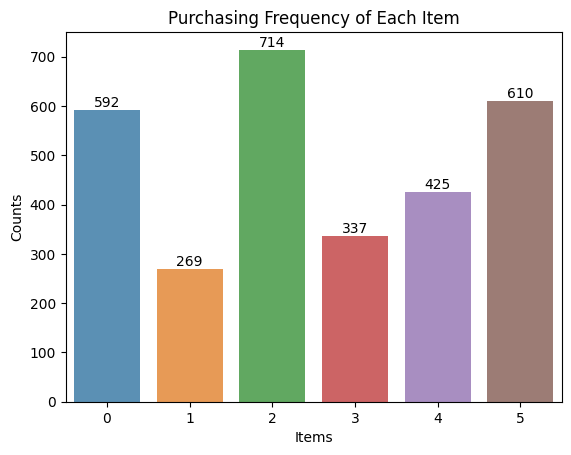

In [ ]:
# Visualize number of item purchased

# Plot a histogram
ax=sns.barplot(x=revenue_per_item['itemId'], y=revenue_per_item['totalBuy'], alpha=0.8)

plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Purchasing Frequency of Each Item')
# Add numbers on top of each bar
for i, v in enumerate(revenue_per_item['totalBuy']):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()


In [ ]:
#Select userid and price from df_buyclicks as an attribute that captures user's purchasing behavior

user_purchases = df_buyclicks[['userId','price' ]]
user_purchases.head(5)

,userId,price
0,1300,3.0
1,868,10.0
2,819,20.0
3,121,3.0
4,2222,20.0


In [ ]:
# Select userid and price from df_buyclicks as an attribute that captures user's purchasing behavior
# Total money spent by each user and rename the columns to be called 'userId' and 'revenue'

revenue_per_user = df_buyclicks[['userId','price' ]].groupby('userId').agg(['count','sum'])
revenue_per_user = revenue_per_user.reset_index()
revenue_per_user.columns = ['userId', 'totalBuyClicks', 'totalRevenue'] #rename the columns
revenue_per_user.head()

,userId,totalBuyClicks,totalRevenue
0,1,9,21.0
1,8,5,53.0
2,9,6,80.0
3,10,10,11.0
4,12,13,215.0


In [ ]:
revenue_per_user.totalRevenue.sum()

21407.0

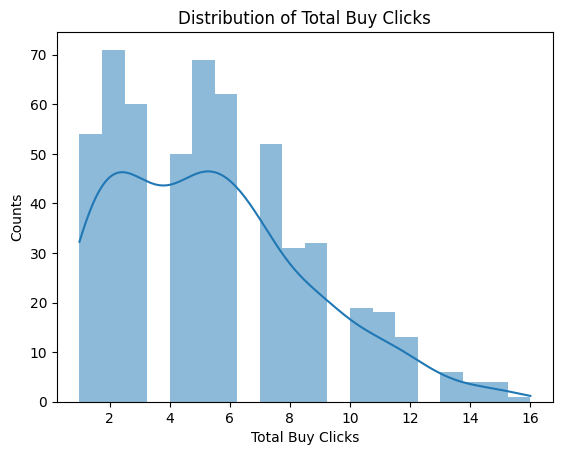

In [ ]:
# Visualize totalRevenue distribution

# Plot a histogram
sns.histplot(revenue_per_user['totalBuyClicks'], kde=True, bins=20, edgecolor='none')

plt.xlabel('Total Buy Clicks')
plt.ylabel('Counts')
plt.title('Distribution of Total Buy Clicks')
plt.show()

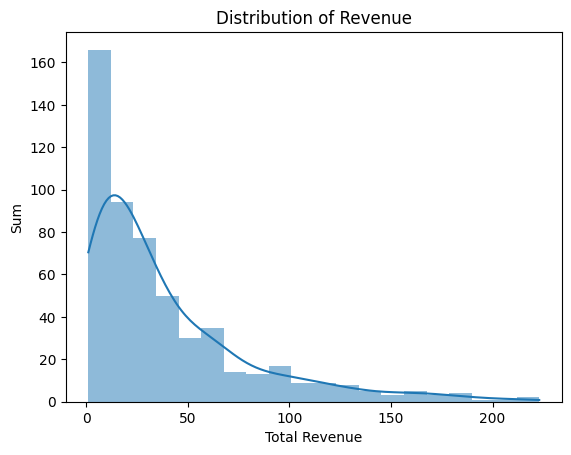

In [ ]:
# Visualize totalRevenue distribution

# Plot a histogram
sns.histplot(revenue_per_user['totalRevenue'], kde=True, bins=20, edgecolor='none')

plt.xlabel('Total Revenue')
plt.ylabel('Sum')
plt.title('Distribution of Revenue')
plt.show()


In [ ]:
# Filter the top 10 users with the highest spending from the revenue_per_user data

revenue_per_user_top10 = revenue_per_user.sort_values(by= 'totalRevenue', ascending=False).head(10)
revenue_per_user_top10

,userId,totalBuyClicks,totalRevenue
504,2229,15,223.0
4,12,13,215.0
107,471,12,202.0
115,511,10,200.0
227,1027,15,189.0
282,1260,14,183.0
141,670,13,183.0
72,352,12,180.0
395,1732,12,172.0
387,1697,14,172.0


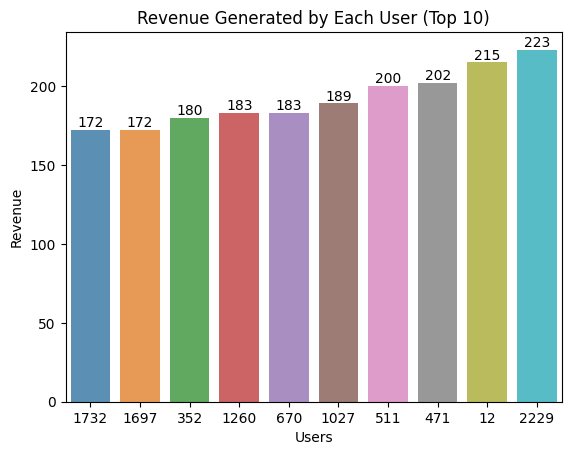

In [ ]:
# Visualize Revenue generated by users (top 10)

# Plot a histogram
# Create the bar plot
ax = sns.barplot(x=revenue_per_user_top10['userId'], y=revenue_per_user_top10['totalRevenue'],alpha=0.8, order=revenue_per_user_top10.sort_values('totalRevenue')['userId'])

# Add numbers on top of each bar
for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Users')
plt.ylabel('Revenue')
plt.title('Revenue Generated by Each User (Top 10)')
plt.show()

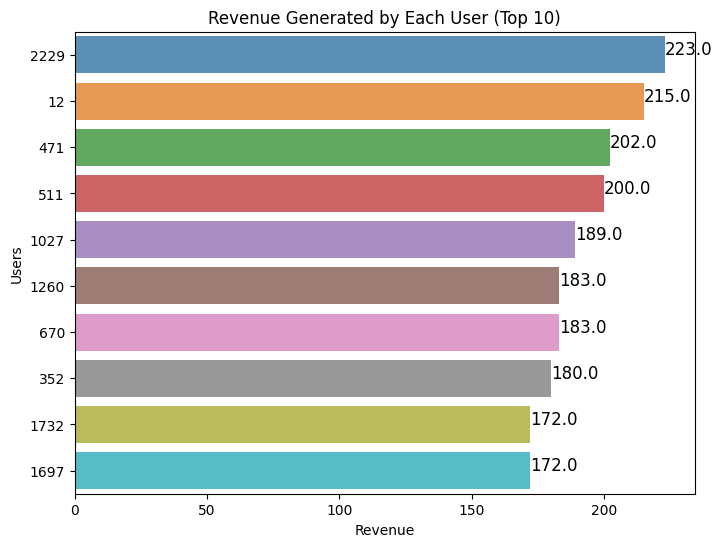

In [ ]:
# Visualize Revenue generated by users (top 10)

# Plot a horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_per_user_top10['totalRevenue'], y=revenue_per_user_top10['userId'], alpha=0.8, orient='h', order=revenue_per_user_top10.sort_values('totalRevenue', ascending=False)['userId'])
y=revenue_per_user_top10['totalRevenue']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.xlabel('Revenue')
plt.ylabel('Users')
plt.title('Revenue Generated by Each User (Top 10)')
plt.show()





In [ ]:
revenue_per_user_top10['userId']

504    2229
4        12
107     471
115     511
227    1027
282    1260
141     670
72      352
395    1732
387    1697
Name: userId, dtype: int64

In [ ]:
username_count = revenue_per_user.sort_values(by= 'totalRevenue', ascending=False)[['userId','totalRevenue']]
username_count

,userId,totalRevenue
504,2229,223.0
4,12,215.0
107,471,202.0
115,511,200.0
227,1027,189.0
...,...,...
251,1112,1.0
200,937,1.0
295,1308,1.0
296,1310,1.0


**Dataset combined-data.csv**

- userid: User ID
- userSessionid: User session ID
- team_level: User’s team level
- platformType: Platform used by user
- count_gameclicks: Total number of game clicks for user session
- count_hits: Total number of game hits for user session
- count_buyid: Total number of purchases for user session
- avg_price: Average purchase price for user session

In [ ]:
# Read file
df_combined = pd.read_csv(path+'/DataSet/combined-data/combined-data.csv')

In [ ]:
df_combined.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [ ]:
# Number of rows and columns in the dataset
df_combined.shape

(4619, 8)

In [ ]:
# Dtypes of features
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userId            4619 non-null   int64  
 1   userSessionId     4619 non-null   int64  
 2   teamLevel         4619 non-null   int64  
 3   platformType      4619 non-null   object 
 4   count_gameclicks  4619 non-null   int64  
 5   count_hits        4619 non-null   int64  
 6   count_buyId       1411 non-null   float64
 7   avg_price         1411 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 288.8+ KB


In [ ]:
# Description of the dataset
df_combined.describe()

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price
count,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,1411.000000,1411.000000
mean,1189.964711,17963.067980,4.355705,143.063001,15.705780,1.683203,7.214323
std,691.098631,7947.681127,1.924663,126.883397,13.986902,0.900509,6.536501
min,0.000000,5648.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,595.000000,10203.000000,3.000000,70.000000,7.000000,1.000000,2.000000
50%,1173.000000,16703.000000,5.000000,107.000000,12.000000,1.000000,3.500000
75%,1762.500000,26220.500000,6.000000,162.500000,19.000000,2.000000,11.250000
max,2389.000000,38722.000000,8.000000,1207.000000,121.000000,6.000000,20.000000


In [ ]:
# Check null value
df_combined.isnull().sum()

userId                 0
userSessionId          0
teamLevel              0
platformType           0
count_gameclicks       0
count_hits             0
count_buyId         3208
avg_price           3208
dtype: int64

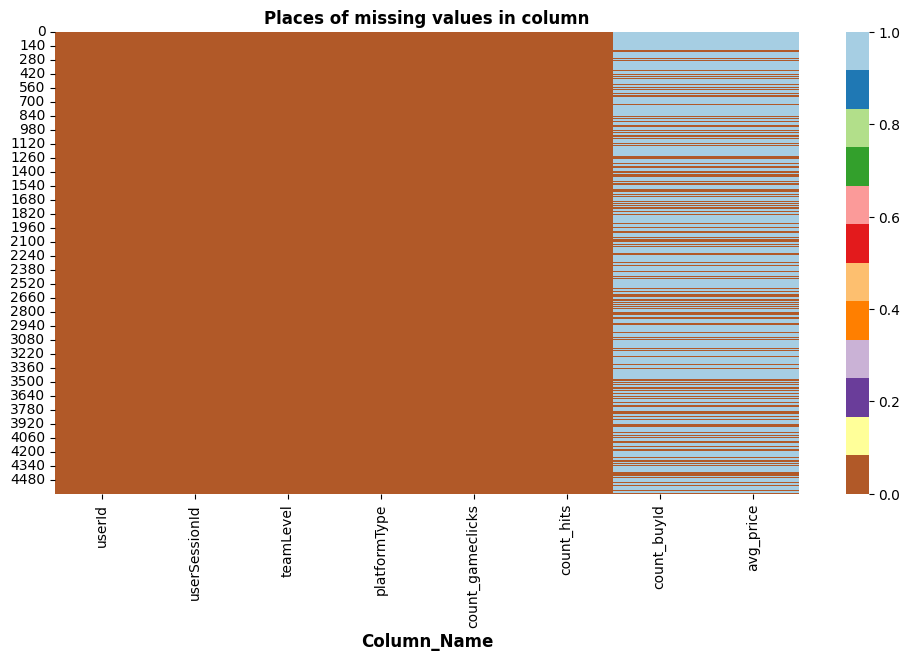

In [ ]:
# Heatmap representation of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=12, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=12)
plt.show()

In [ ]:
# Remove rows with NaN values
df_combined = df_combined.dropna()

df_combined.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [ ]:
# Number of rows and columns in the new dataset
df_combined.shape

(1411, 8)

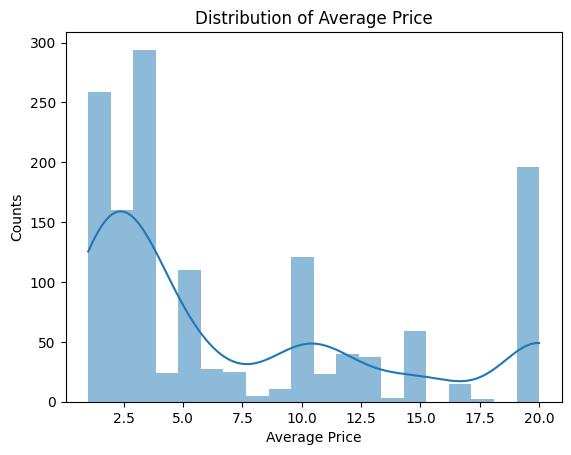

In [ ]:
# Plot a histogram of average price
sns.histplot(df_combined['avg_price'], kde=True, bins=20, edgecolor='none')

plt.xlabel('Average Price')
plt.ylabel('Counts')
plt.title('Distribution of Average Price')
plt.show()

In [ ]:
pla = df_combined['platformType'].value_counts().sort_values(ascending=False)
pla

iphone     555
android    513
windows    203
linux       96
mac         44
Name: platformType, dtype: int64

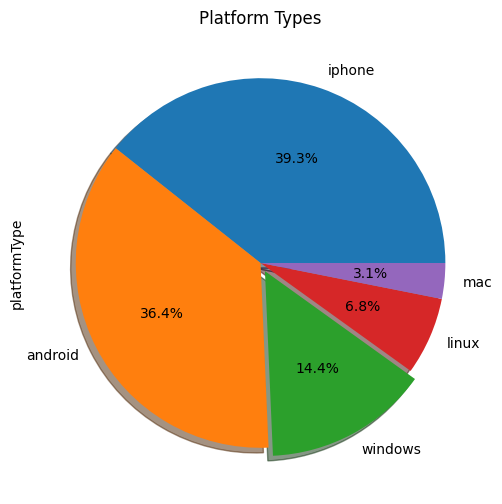

In [ ]:
# Visualize platformType

explode = (0, 0, 0.05, 0, 0) 
plt.figure(figsize=(6,6))
pla[0:5].plot(kind = 'pie', title = 'Platform Types', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

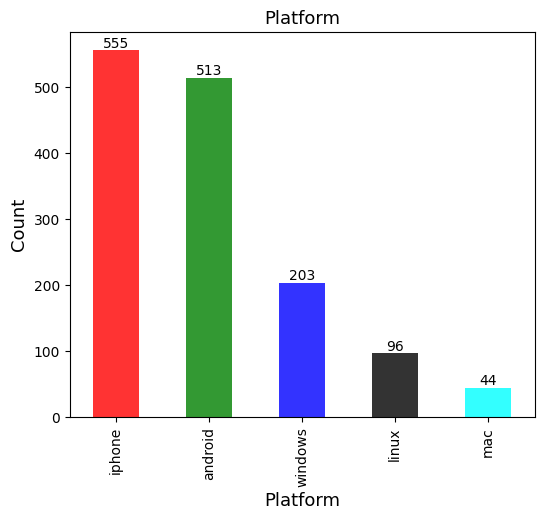

In [ ]:
plt.figure(figsize=(6,5))

# Create the bar plot
ax = pla.plot.bar(color=['red', 'green', 'blue', 'black','cyan'], alpha=0.8)

# Add numbers on top of each bar
for i, v in enumerate(pla):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Platform', size=13)
plt.xlabel('Platform', size=13)
plt.ylabel('Count', size=13)
plt.show()


In [ ]:
# Attribute Creation
# HighRollers(1) purchase items > $5.00, PennyPincher(0) purchase items <= $5.00 .

df_combined['label'] = df_combined['avg_price'].apply(lambda x: 1 if x > 5 else 0)
df_combined.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,label
4,937,5652,1,android,39,0,1.0,1.0,0
11,1623,5659,1,iphone,129,9,1.0,10.0,1
13,83,5661,1,android,102,14,1.0,5.0,0
17,121,5665,1,android,39,4,1.0,3.0,0
18,462,5666,1,android,90,10,1.0,3.0,0


In [ ]:
df_combined['label'].value_counts()

0    836
1    575
Name: label, dtype: int64

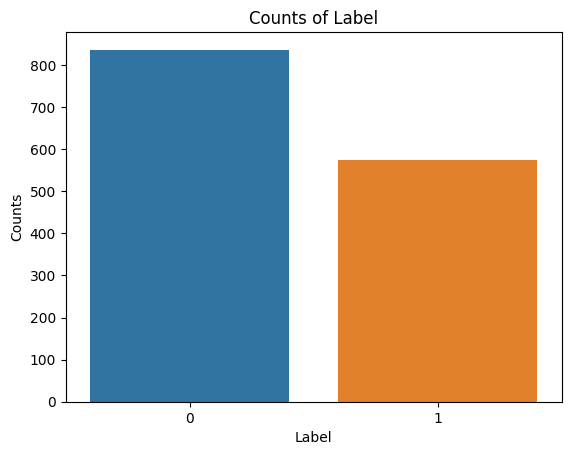

In [ ]:
counts = df_combined['label'].value_counts()

# Create a bar chart using seaborn
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Counts of Label')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the 'platformType' column
df_combined['platformType_encoded'] = encoder.fit_transform(df_combined['platformType'])
df_combined

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,label,platformType_encoded
4,937,5652,1,android,39,0,1.0,1.0,0,0
11,1623,5659,1,iphone,129,9,1.0,10.0,1,1
13,83,5661,1,android,102,14,1.0,5.0,0,0
17,121,5665,1,android,39,4,1.0,3.0,0,0
18,462,5666,1,android,90,10,1.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4596,2052,35370,3,linux,119,14,1.0,1.0,0,2
4597,2316,35475,4,iphone,190,21,1.0,5.0,0,1
4614,1399,37261,6,mac,28,3,1.0,2.0,0,3
4615,248,37491,3,iphone,108,11,2.0,10.0,1,1


<Axes: >

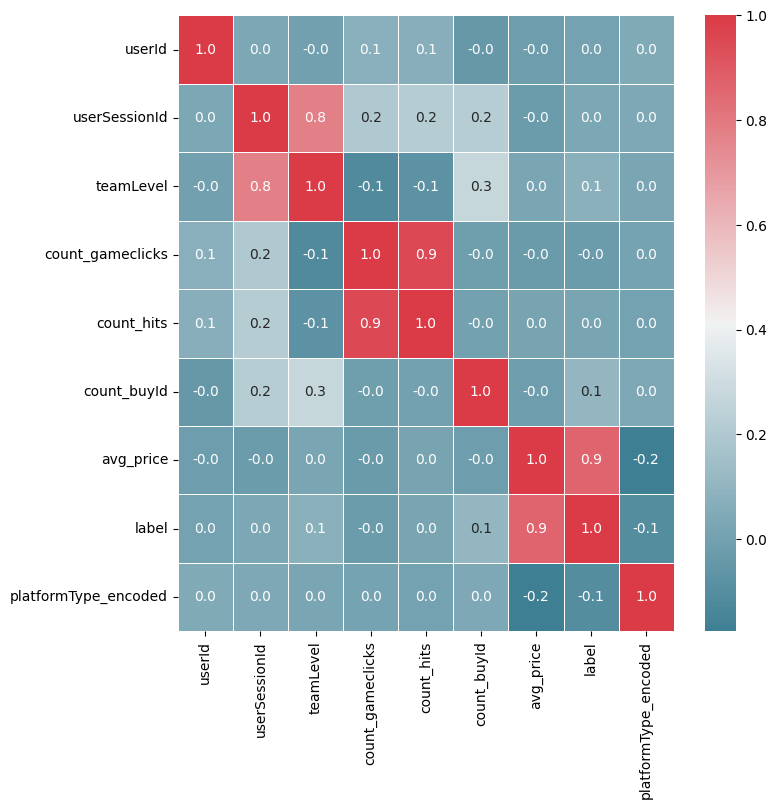

In [ ]:
# Display the correlation heatmap

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_combined.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)

**Dataset users.csv**

In [4]:
# Read file
df_users = pd.read_csv(path+'/DataSet/flamingo-data/users.csv')

In [5]:
df_users.head()

,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC


In [6]:
#Dtypes of features
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2393 non-null   object
 1   userId     2393 non-null   int64 
 2   nick       2393 non-null   object
 3   twitter    2393 non-null   object
 4   dob        2393 non-null   object
 5   country    2383 non-null   object
dtypes: int64(1), object(5)
memory usage: 112.3+ KB


In [7]:
#Description of the dataset
df_users.describe()

,userId
count,2393.00000
mean,1196.00000
std,690.94392
min,0.00000
25%,598.00000
50%,1196.00000
75%,1794.00000
max,2392.00000


In [8]:
# Check null value
df_users.isnull().sum()

timestamp     0
userId        0
nick          0
twitter       0
dob           0
country      10
dtype: int64

In [10]:
df_users['dob'] = pd.to_datetime(df_users['dob'], format='%Y-%m-%d')
df_users.head()

,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC


In [15]:
# Count the number of users in each birth year group
df_users['year'] = df_users['dob'].dt.year
df_users.head()

,timestamp,userId,nick,twitter,dob,country,year
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,1994
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU,1971
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS,1970
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM,1965
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,1994


In [57]:
# Group birth years into 5-year intervals
df_users['year_group'] = pd.cut(df_users['year'], bins=range(df_users['year'].min(), df_users['year'].max()+6, 5))

In [59]:
# Create DataFrame from value counts
age_group_counts = df_users['year_group'].value_counts()
df_age_group_counts = pd.DataFrame(age_group_counts).reset_index()

# Rename the columns
df_age_group_counts.columns = ['age_group', 'count']

# Print the resulting DataFrame
df_age_group_counts

,age_group,count
0,"(1991, 1996]",320
1,"(1986, 1991]",294
2,"(1981, 1986]",290
3,"(1976, 1981]",282
4,"(1971, 1976]",257
5,"(1966, 1971]",211
6,"(1961, 1966]",209
7,"(1956, 1961]",176
8,"(1951, 1956]",132
9,"(1946, 1951]",126


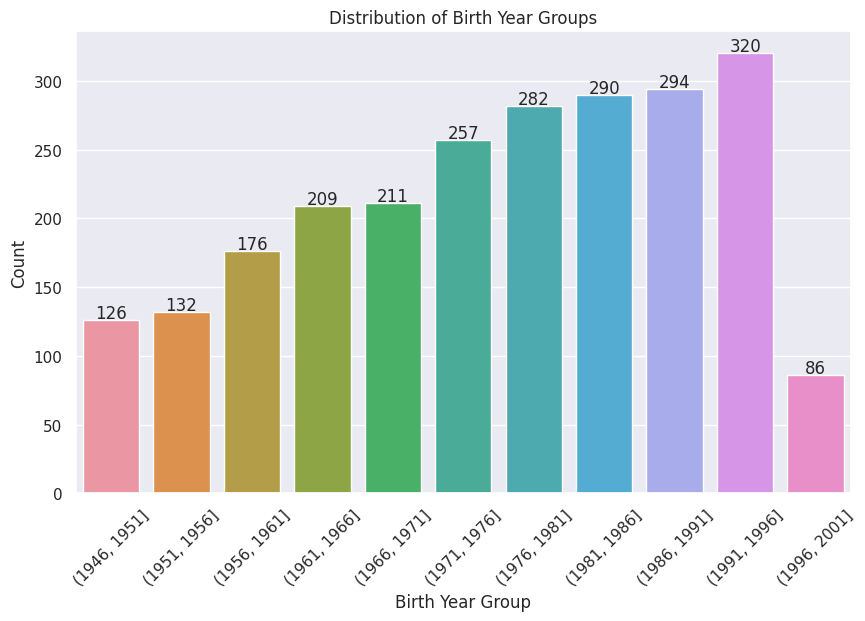

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_users, x='year_group')
plt.title("Distribution of Birth Year Groups")
plt.xlabel("Birth Year Group")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Display count labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


In [64]:
# Group birth years into 5-year intervals
df_users['year_group_10'] = pd.cut(df_users['year'], bins=range(df_users['year'].min(), df_users['year'].max()+11, 10))
df_users['year_group_10'].value_counts()

(1986, 1996]    614
(1976, 1986]    572
(1966, 1976]    468
(1956, 1966]    385
(1946, 1956]    258
(1996, 2006]     86
Name: year_group_10, dtype: int64

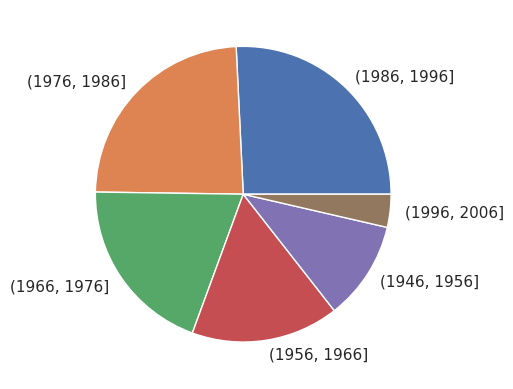

In [65]:
# Get the value counts of 'year_group_10' column
counts = df_users['year_group_10'].value_counts()

# Create a pie chart with the counts and labels
plt.pie(counts, labels=counts.index)

# Display the pie chart
plt.show()


In [34]:
df_users['country'].value_counts()

BA    10
ET    10
MU    10
CV    10
FM    10
      ..
MZ     9
JP     9
GS     9
UA     9
AG     9
Name: country, Length: 240, dtype: int64

In [73]:
import requests

# Get the unique countries and their counts
country_counts = df_users['country'].value_counts()

# Initialize lists to store latitude and longitude coordinates
latitude = []
longitude = []

# Iterate over each country and retrieve coordinates
for country, count in country_counts.items():
    url = f'https://api.opencagedata.com/geocode/v1/json?q={country}&key=bf694becae34483ea93aafa1d3593c21'
    response = requests.get(url)
    data = response.json()
    if len(data['results']) > 0:
        lat = data['results'][0]['geometry']['lat']
        lon = data['results'][0]['geometry']['lng']
        latitude.extend([lat])
        longitude.extend([lon])

# Print the latitude and longitude values
print(latitude)
print(longitude)


[44.3053476, 10.2116702, -20.2759451, 16.0000552, 43.0922489, 8.7800265, 42.6384261, 48.3800301, 32.6475314, -12.2045176, 15.1009234, 7.9897371, 21.0000287, 38.6281733, 24.4769288, 51.6804093, 51.2517675, 8.0018709, 32.3293809, -2.9814344, 38.7604815, -5.3497093, 16.2528827, 0.3448612, 45.3658443, 49.9258239, -31.7613365, -10.4837768, 33.6874388, 50.776351, 5.3783537, 19.1399952, 18.1850507, 47.1817585, 13.8000382, 47.59397, 47.59397, 51.4413766, 8.0300284, -19.9160819, 4.8417097, 1.357107, 54.5859836, 52.2476498, 47.3752671, 50.6402809, 33.0955793, 36.638392, 37.5726028, 45.709097, 1.613172, 24.7736546, 3.7203503, 1.5333554, 34.0346534, 41.7370229, 50.0601579, 14.4750607, 15.5855545, 8.3676771, 30.8703881, 46.5036807, 8.6400349, 48.2031834, 49.7439047, 52.215933, 15.1753648, 54.24556, 42.6073975, 33.2588817, 31.5563051, 38.9597594, 23.6585116, -17.0568696, -1.3397668, 35.7730076, 16.3471243, 50.6402809, -30.7054363, 39.3763807, -32.8755548, 45.9896587, 44.3053476, 39.7837304, -24.7761

In [84]:
labels = list(df_users['country'].value_counts().index)
numbers = list(df_users['country'].value_counts().values)

In [85]:
import folium

latitude = latitude
longtitude = longitude
labels = labels
numbers = numbers

# Create the base map
m = folium.Map(location=[48, 2], zoom_start=3)

# Add circle markers for each location with the corresponding size and label
for lat, lon, label, num in zip(latitude, longtitude, labels, numbers):
    folium.CircleMarker(location=[lat, lon], radius=num/10, 
                        popup=label, tooltip=f"{num} tweets", 
                        color='blue', fill=True, fill_color='blue').add_to(m)

# Show the map
m